[Reference](https://towardsdatascience.com/7-cool-python-packages-kagglers-are-using-without-telling-you-e83298781cf4)

# 1. UMAP

In [1]:
pip install umap-learn

In [2]:
import umap

# Create the mapper
mapper = umap.UMAP()
# Fit to the data
mapper.fit(X, y)

# Plot as a scatterplot
umap.plot.points(mapper)

# 2. Datatable

In [3]:
pip install datatable

In [4]:
 # pip install datatable

frame = dt.fread("data/station_day.csv")
frame.head(5)

In [8]:
from datatable import by, f, sum
import datatable as dt 
import seaborn as sns

tips = sns.load_dataset("tips")
frame = dt.Frame(tips)
frame[:, sum(f.total_bill), by(f.size)]

,size,total_bill
,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪
0,1,28.97
1,2,2565.89
2,3,884.55
3,4,1058.7
4,5,150.34
5,6,139.32


# 3. Lazypredict

In [9]:
pip install lazypredict

In [10]:
from lazypredict.Supervised import (
    LazyClassifier,
    LazyRegressor,
)
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

# Load data and split
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit LazyRegressor
reg = LazyRegressor(
    ignore_warnings=True, random_state=1121218, verbose=False
  )
models, predictions = reg.fit(X_train, X_test, y_train, y_test)  # pass all sets

models.head(10)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
100%|██████████| 42/42 [00:03<00:00, 12.15it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,0.86,0.88,2.62,0.39
ExtraTreesRegressor,0.86,0.88,2.63,0.23
BaggingRegressor,0.85,0.87,2.78,0.05
GradientBoostingRegressor,0.84,0.86,2.79,0.19
LGBMRegressor,0.84,0.86,2.85,0.07
XGBRegressor,0.83,0.85,2.90,0.23
HistGradientBoostingRegressor,0.82,0.84,3.00,0.27
AdaBoostRegressor,0.78,0.81,3.30,0.11
KNeighborsRegressor,0.76,0.79,3.47,0.02


# 4. Optuna

In [11]:
pip install optuna

     |████████████████████████████████| 302 kB 8.1 MB/s 
     |████████████████████████████████| 80 kB 7.1 MB/s 
     |████████████████████████████████| 164 kB 57.1 MB/s 
     |████████████████████████████████| 75 kB 4.6 MB/s 
     |████████████████████████████████| 111 kB 60.9 MB/s 
     |████████████████████████████████| 49 kB 6.8 MB/s 
     |████████████████████████████████| 141 kB 44.0 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=0b3b77beb2ac7e0547ddd33984672c6f3f3952cb6c8979d65fcc18e0ac95b555
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [12]:
import optuna 

def objective(trial):
    x = trial.suggest_float("x", -7, 7)
    y = trial.suggest_float("y", -7, 7)
    return (x - 1) ** 2 + (y + 3) ** 2

study = optuna.create_study()
study.optimize(objective, n_trials=200)  # number of iterations

study.best_params

[I 2021-08-09 11:53:13,919] A new study created in memory with name: no-name-50bfb082-b1ff-4656-aa1a-2062e0e2efb4
[I 2021-08-09 11:53:13,924] Trial 0 finished with value: 64.55106302092564 and parameters: {'x': 2.0219973240178497, 'y': 4.969101862231778}. Best is trial 0 with value: 64.55106302092564.
[I 2021-08-09 11:53:13,931] Trial 1 finished with value: 34.582395735396794 and parameters: {'x': 6.200392735389544, 'y': -0.25440149819671376}. Best is trial 1 with value: 34.582395735396794.
[I 2021-08-09 11:53:13,934] Trial 2 finished with value: 104.1280293272745 and parameters: {'x': -1.0591895260470388, 'y': 6.99438681576277}. Best is trial 1 with value: 34.582395735396794.
[I 2021-08-09 11:53:13,938] Trial 3 finished with value: 46.96094877599998 and parameters: {'x': -1.5080010943731352, 'y': 3.37737244377519}. Best is trial 1 with value: 34.582395735396794.
[I 2021-08-09 11:53:13,942] Trial 4 finished with value: 64.49895190450376 and parameters: {'x': -1.3337882578361429, 'y': 4

{'x': 0.9729714617874795, 'y': -2.9855894044709865}

In [13]:
study.best_value

0.0009382071414065035

# 5. SHAP

In [15]:
pip install shap

     |████████████████████████████████| 356 kB 7.6 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491651 sha256=03ad5cee3eed25b52749dfa6e97364aecb94b53e81493d2664b22e3a3b2fa8e6
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


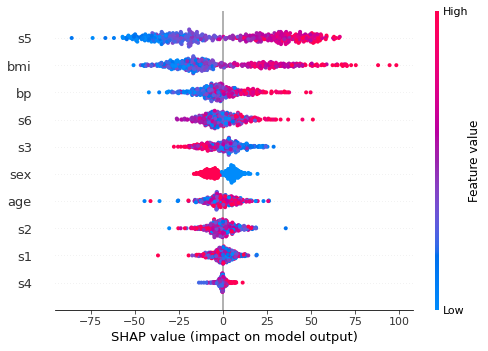

In [16]:
import shap
import xgboost as xgb

# Load and train a model
X, y = shap.datasets.diabetes()
clf = xgb.XGBRegressor().fit(X, y)

# Explain model's predictions with SHAP
explainer = shap.Explainer(clf)
shap_values = explainer(X)

# Visualize the predictions' explanation
shap.plots.beeswarm(shap_values)

# 6. Rapids cuDF

In [17]:
import cudf, io, requests
from io import StringIO

url = "https://github.com/plotly/datasets/raw/master/tips.csv"
content = requests.get(url).content.decode('utf-8')

tips_df = cudf.read_csv(StringIO(content))
tips_df['tip_percentage'] = tips_df['tip'] / tips_df['total_bill'] * 100

# display average tip by dining party size
print(tips_df.groupby('size').tip_percentage.mean())

# 7. Automatic EDA libraries
- Automatic EDA libraries
- AutoViz
- PandasProfiling
- Lux